# import lib

In [1]:
#dataset is  'https://www.kaggle.com/c/house-prices-advanced-regression-techniques'
#refer https://www.kaggle.com/marsggbo/kaggle/comments#%E4%BA%8C%E3%80%81%E8%A7%82%E5%AF%9F%E5%90%84%E9%A1%B9%E4%B8%BB%E8%A6%81%E7%89%B9%E5%BE%81%E4%B8%8E%E6%88%BF%E5%B1%8B%E5%94%AE%E4%BB%B7%E7%9A%84%E5%85%B3%E7%B3%BB

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# !pip3 install -q tensorflow==2.0.0-beta1
import tensorflow as tf

import pixiedust
print(tf.__version__)

import os 
import sys 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)

# import sklearn.preprocessing

Pixiedust database opened successfully


1.13.1


# load data

In [3]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")


# dataset_train.head()
# dataset_train.describe()


# preprocess data

In [ ]:
from mypackage.data_printer import DataPrinter
DataPrinter.print_highly_related_features(dataset_train, 'SalePrice', 0.1)

In [ ]:
high_related_features = ['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC',
       'SaleCondition']

from mypackage.data_handler import get_train_X
from mypackage.data_handler import get_test_X
from mypackage.data_handler import match_columns_for_text_X


train_X = get_train_X(dataset_train[high_related_features])
train_y = np.log1p(dataset_train['SalePrice'])

test_X = get_test_X(dataset_test[high_related_features])
test_X = match_columns_for_text_X(test_X, train_X)


# define model

In [7]:

# print('{} num_features'.format(num_features))
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(train_X.shape[1], ), activation="relu"))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam()
metrics = [tf.keras.metrics.MAPE]
# loss = tf.keras.losses.MSLE
model.compile(optimizer, loss=tf.keras.losses.MSLE, metrics = metrics) #平均均方对数误差
# model.compile(optimizer, loss=tf.keras.losses.MeanSquaredLogarithmicError()) #rmsle
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 186       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


# train model

In [8]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=2)
history = model.fit(train_X, train_y, batch_size=64, epochs=40, validation_split=0.1)

Train on 1314 samples, validate on 146 samples
Epoch 1/40
1314/1314 [==============================] - 0s 190us/sample - loss: 5.7463 - mean_absolute_percentage_error: 98.3744 - val_loss: 5.4308 - val_mean_absolute_percentage_error: 97.7066
Epoch 2/40
1314/1314 [==============================] - 0s 24us/sample - loss: 5.1733 - mean_absolute_percentage_error: 97.0423 - val_loss: 4.8427 - val_mean_absolute_percentage_error: 96.2188
Epoch 3/40
1314/1314 [==============================] - 0s 25us/sample - loss: 4.5842 - mean_absolute_percentage_error: 95.4306 - val_loss: 4.2621 - val_mean_absolute_percentage_error: 94.4622
Epoch 4/40
1314/1314 [==============================] - 0s 34us/sample - loss: 4.0153 - mean_absolute_percentage_error: 93.5545 - val_loss: 3.7149 - val_mean_absolute_percentage_error: 92.4532
Epoch 5/40
1314/1314 [==============================] - 0s 37us/sample - loss: 3.4920 - mean_absolute_percentage_error: 91.4479 - val_loss: 3.2242 - val_mean_absolute_percentage_er

<Figure size 432x288 with 0 Axes>

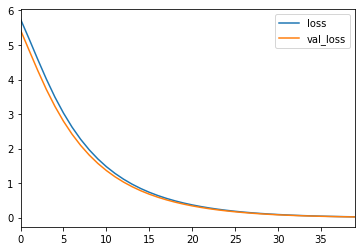

<Figure size 432x288 with 0 Axes>

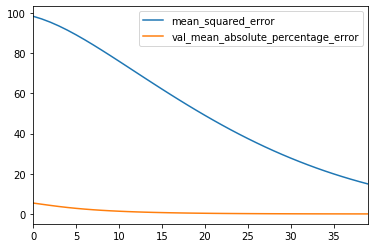

In [9]:
# his_dict = history.history['loss']
plt.figure()
df_his = pd.DataFrame({"loss" : history.history['loss'], "val_loss" : history.history['val_loss']})
df_his.plot()

plt.figure()
df_his = pd.DataFrame({"mean_squared_error" : history.history['mean_absolute_percentage_error'], "val_mean_absolute_percentage_error" : history.history['val_loss']})
df_his.plot()

plt.show()

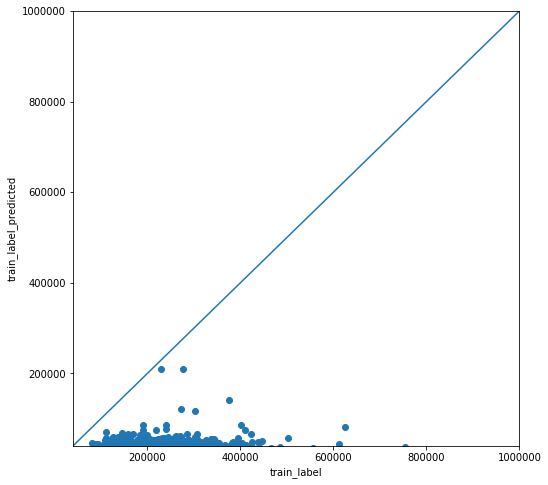

In [10]:
label_origin = np.expm1(train_y)

train_label_predicted = model.predict(train_X) 
train_label_predicted = np.expm1(train_label_predicted)

plt.figure(figsize=(8, 8))
plt.scatter(label_origin, train_label_predicted)
plt.xlim(40000, 1000000)
plt.ylim(40000, 1000000)
plt.plot([0, 1000000], [0, 1000000])
plt.xlabel("train_label")
plt.ylabel("train_label_predicted")
plt.show()

# predict 

In [12]:
results = model.predict(test_X) 
results  = np.expm1(results)
display(results)

array([[2669.6345],
       [3305.5088],
       [3025.123 ],
       ...,
       [5219.9883],
       [4141.37  ],
       [8602.6455]], dtype=float32)

In [13]:
results = results.reshape(1,-1)[0]
print('test_x.shape={},  result.shape={}'.format(test_X.shape[0], len(results)))
dataset_test["SalePrice"] = pd.Series(results)

test_x.shape=1459,  result.shape=1459


In [14]:
submission = pd.concat([dataset_test['Id'], dataset_test['SalePrice']], axis = 1)
submission.to_csv("submission.csv", index = False, mode="w")
submission.head()

,Id,SalePrice
0,1461,2669.634521
1,1462,3305.508789
2,1463,3025.123047
3,1464,2594.464355
4,1465,4546.343262


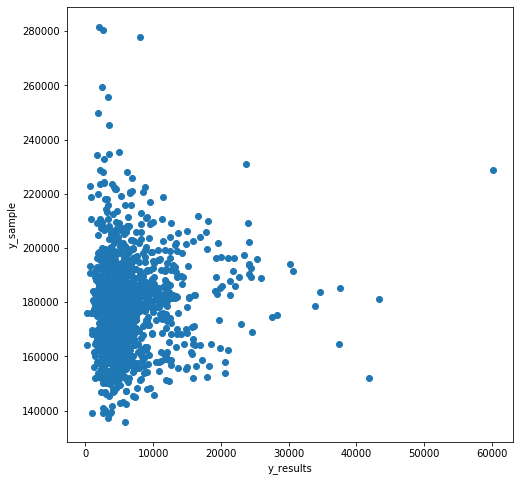

In [15]:
#compare to sample_submission
df_sample_submission = pd.read_csv('sample_submission.csv')

y_submission = results
y_submission_sample = df_sample_submission['SalePrice']
plt.figure(figsize=(8, 8))
# plt.xlim(40000, 1000000)
# plt.ylim(40000, 1000000)
# plt.plot([0, 1000000], [0, 1000000])
plt.xlabel('y_results')
plt.ylabel('y_sample')
plt.scatter(y_submission, y_submission_sample)